In [212]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



In [213]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning
## Handling Misssing Values 
1. Handling Missing Values 
2. Handling Duplicates
3. Check Data Type
4. Understand the dataset

In [214]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [215]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [216]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [217]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [218]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [219]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [220]:
## Check Missing Values
## these are the features with nan values

features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for features in features_with_na:
    print(features,np.round(df[features].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [221]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values

1. Impute Median values for Age column 
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting 
8. Impute Median for MonthlyIncome

In [222]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberofFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [223]:
df.head()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [224]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [225]:
df.drop('CustomerID', inplace=True, axis=1)

In [226]:
## Create new column for features 
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)

In [227]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Num of numeriacal Features : ", len(num_features))

Num of numeriacal Features :  12


In [228]:
##Categorical Features 
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Num of catgorical Features : ", len(cat_features))

Num of catgorical Features :  6


In [229]:
## Discrete Features
discrete_features= [features for features in num_features if len(df[features].unique())<=25]
print("Number of discreate features are",len(discrete_features))

Number of discreate features are 9


In [230]:
## Contunious_features
Contunious_features= [features for features in num_features if features not in discrete_features]
print("Number of Contunious features features are",len(Contunious_features))

Number of Contunious features features are 3


## Train Test Split And Model Training

In [231]:
from sklearn.model_selection import train_test_split
x = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [232]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [233]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [234]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 40)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [236]:
# Create Column Tranformer with 3 type of transformers
cat_features = x.select_dtypes(include="object").columns
num_features = x.select_dtypes(exclude ="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [237]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [238]:
## Applying Transformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711858,-0.404857,0.298888,-0.725667,-0.677196,1.57339,0.681916,-1.284154,-0.006331,0.645722
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,0.897627,0.298888,-0.725667,-1.232647,1.57339,1.413008,0.778723,-1.142555,-0.765160
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.711858,-1.115303,-0.710311,-0.725667,0.989158,1.57339,-0.780268,-1.284154,-0.125914,-0.765160
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.711858,-0.523265,0.298888,-0.725667,-0.677196,1.57339,0.681916,-1.284154,-0.153654,-0.765160
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.472030,-1.115303,-0.710311,-0.725667,0.433707,-0.63557,-0.049176,0.778723,-1.054086,-0.765160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.711858,-0.523265,0.298888,-0.725667,-0.677196,-0.63557,-0.049176,0.778723,0.035091,-0.059719
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,2.318518,0.298888,-0.725667,1.544609,-0.63557,1.413008,0.778723,-0.438741,0.645722
3907,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.711858,1.844888,1.308087,1.781941,-0.121745,-0.63557,1.413008,-1.284154,0.366849,2.056604
3908,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.711858,2.200111,1.308087,1.781941,-0.121745,-0.63557,0.681916,0.778723,-0.430307,0.645722


In [239]:
## applying transformation on test(transform)
X_test=preprocessor.transform(X_test)

In [240]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711858,2.318518,-0.710311,-0.725667,1.544609,-0.63557,-0.780268,0.778723,-0.952310,-1.470601
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.380086,2.081703,0.298888,-0.725667,-0.121745,1.57339,-1.511360,0.778723,0.746403,-0.059719
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,-0.286450,-2.728710,-0.725667,0.989158,-0.63557,0.681916,0.778723,-1.207782,-1.470601
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.472030,0.779219,0.298888,-0.725667,0.989158,-0.63557,1.413008,0.778723,-0.412126,-0.765160
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,-0.760080,1.308087,0.528137,-0.677196,-0.63557,-1.511360,-1.284154,-0.309974,2.056604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.711858,0.779219,-2.728710,1.781941,-0.677196,-0.63557,-1.511360,0.778723,-1.085200,-1.470601
974,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.711858,-0.049634,1.308087,1.781941,-0.677196,1.57339,-1.511360,0.778723,-0.044943,2.056604
975,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.472030,-0.523265,1.308087,0.528137,-0.121745,1.57339,-0.049176,0.778723,0.066393,0.645722
976,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711858,-0.760080,-0.710311,-0.725667,0.989158,-0.63557,-0.049176,0.778723,-1.206283,-1.470601


## Random Forest Classifier Training

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,\
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [242]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)  #Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score =  roc_auc_score(y_train, y_train_pred)

        # Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score =  roc_auc_score(y_test,  y_test_pred)

    print(list(models.keys())[i])

    print('model performance for training data set')
    print("- Accuracy: {:.4f}", format(model_train_accuracy))
    print("- F1 score: {:.4f}", format(model_train_f1))
    print("- Precision: {:.4f}", format(model_train_precision))
    print("- Recall: {:.4f}", format(model_train_recall))
    print("- roc_auc_score: {:.4f}", format( model_train_rocauc_score))

    print("-------------------------------------------------------------")

    print('model performance for test dataset')
    print("- Accuracy: {:.4f}", format(model_test_accuracy))
    print("- F1 score: {:.4f}", format(model_test_f1))
    print("- Precision: {:.4f}", format(model_test_precision))
    print("- Recall: {:.4f}", format(model_test_recall))
    print("- roc_auc_score: {:.4f}", format( model_test_rocauc_score))




Logistic Regression
model performance for training data set
- Accuracy: {:.4f} 0.8411764705882353
- F1 score: {:.4f} 0.8139852683181467
- Precision: {:.4f} 0.6900958466453674
- Recall: {:.4f} 0.2918918918918919
- roc_auc_score: {:.4f} 0.6306462614033593
-------------------------------------------------------------
model performance for test dataset
- Accuracy: {:.4f} 0.8496932515337423
- F1 score: {:.4f} 0.8241295070987011
- Precision: {:.4f} 0.7142857142857143
- Recall: {:.4f} 0.3055555555555556
- roc_auc_score: {:.4f} 0.6389933166248956
Decision Tree
model performance for training data set
- Accuracy: {:.4f} 1.0
- F1 score: {:.4f} 1.0
- Precision: {:.4f} 1.0
- Recall: {:.4f} 1.0
- roc_auc_score: {:.4f} 1.0
-------------------------------------------------------------
model performance for test dataset
- Accuracy: {:.4f} 0.9079754601226994
- F1 score: {:.4f} 0.9087439270119387
- Precision: {:.4f} 0.7393617021276596
- Recall: {:.4f} 0.7722222222222223
- roc_auc_score: {:.4f} 0.85540935

In [243]:
## Hyperparameter Training

rf_params = {"max_depth": [5, 8, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [244]:
rf_params

{'max_depth': [5, 8, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [245]:
# Models list for Hyperparameter Tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params)

]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [246]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, 
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"----------------Best Params for {model_name}----------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


----------------Best Params for RF----------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [248]:
models={
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None), # type: ignore

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)  #Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score =  roc_auc_score(y_train, y_train_pred)

        # Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score =  roc_auc_score(y_test,  y_test_pred)

    print(list(models.keys())[i])

    print('model performance for training data set')
    print("- Accuracy: {:.4f}", format(model_train_accuracy))
    print("- F1 score: {:.4f}", format(model_train_f1))
    print("- Precision: {:.4f}", format(model_train_precision))
    print("- Recall: {:.4f}", format(model_train_recall))
    print("- roc_auc_score: {:.4f}", format( model_train_rocauc_score))

    print("-------------------------------------------------------------")

    print('model performance for test dataset')
    print("- Accuracy: {:.4f}", format(model_test_accuracy))
    print("- F1 score: {:.4f}", format(model_test_f1))
    print("- Precision: {:.4f}", format(model_test_precision))
    print("- Recall: {:.4f}", format(model_test_recall))
    print("- roc_auc_score: {:.4f}", format( model_test_rocauc_score))


Random Forest
model performance for training data set
- Accuracy: {:.4f} 1.0
- F1 score: {:.4f} 1.0
- Precision: {:.4f} 1.0
- Recall: {:.4f} 1.0
- roc_auc_score: {:.4f} 1.0
-------------------------------------------------------------
model performance for test dataset
- Accuracy: {:.4f} 0.9335378323108384
- F1 score: {:.4f} 0.9288689399616511
- Precision: {:.4f} 0.952755905511811
- Recall: {:.4f} 0.6722222222222223
- roc_auc_score: {:.4f} 0.8323517126148705


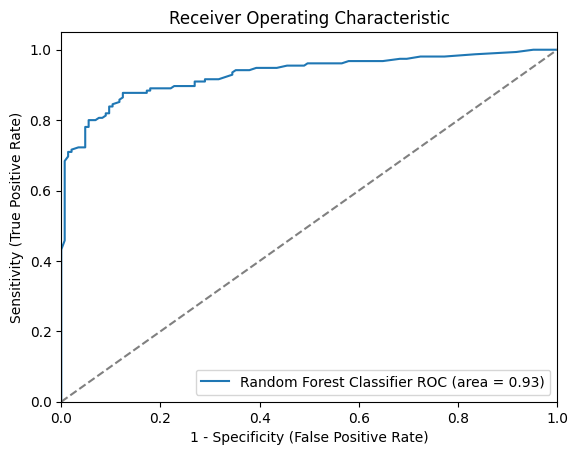

In [249]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Sample dataset creation
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models you want to compare
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None),
        'auc': 0.8323  # This will be updated with the actual computed AUC
    }
]

plt.figure()

# Loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model
    
    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Calculate Area Under the Curve to display on the plot
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    algo['auc'] = auc_score  # Update the AUC in the dictionary
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], '--', color='gray')  # Diagonal line representing random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Save the plot
plt.savefig("auc.png")

# Display the plot
plt.show()
